In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("PowerMeter.csv", parse_dates=["Time"])

df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

print(df[df['Time'].isna()])
df.head()


Empty DataFrame
Columns: [Time, IRMS1, IRMS2, IRMS3]
Index: []


,Time,IRMS1,IRMS2,IRMS3
0,2024-10-11 00:00:00+00:00,2.07,9.92,10.73
1,2024-10-11 00:01:00+00:00,1.22,9.66,10.78
2,2024-10-11 00:02:00+00:00,1.28,9.94,10.80
3,2024-10-11 00:03:00+00:00,1.28,10.14,10.84
4,2024-10-11 00:04:00+00:00,1.22,9.96,10.84


In [9]:
def initialize(dff):
    dfc = dff.copy()
    dfc['TimeDiff'] = dfc['Time'].diff().dt.total_seconds()

    dfc['LargeGap'] = dfc['TimeDiff'] > 600

    dfc['BackwardJump'] = dfc['TimeDiff'] < 0

    dfc['DuplicateTime'] = dfc['TimeDiff'] == 0

    dfc['BadYear'] = (dfc['Time'].dt.year < 2000) | (dfc['Time'].dt.year > 2025)
    
    dfc[['Time', 'TimeDiff', 'LargeGap', 'BackwardJump', 'BadYear']].head(10)
    return dfc

df = initialize(df)

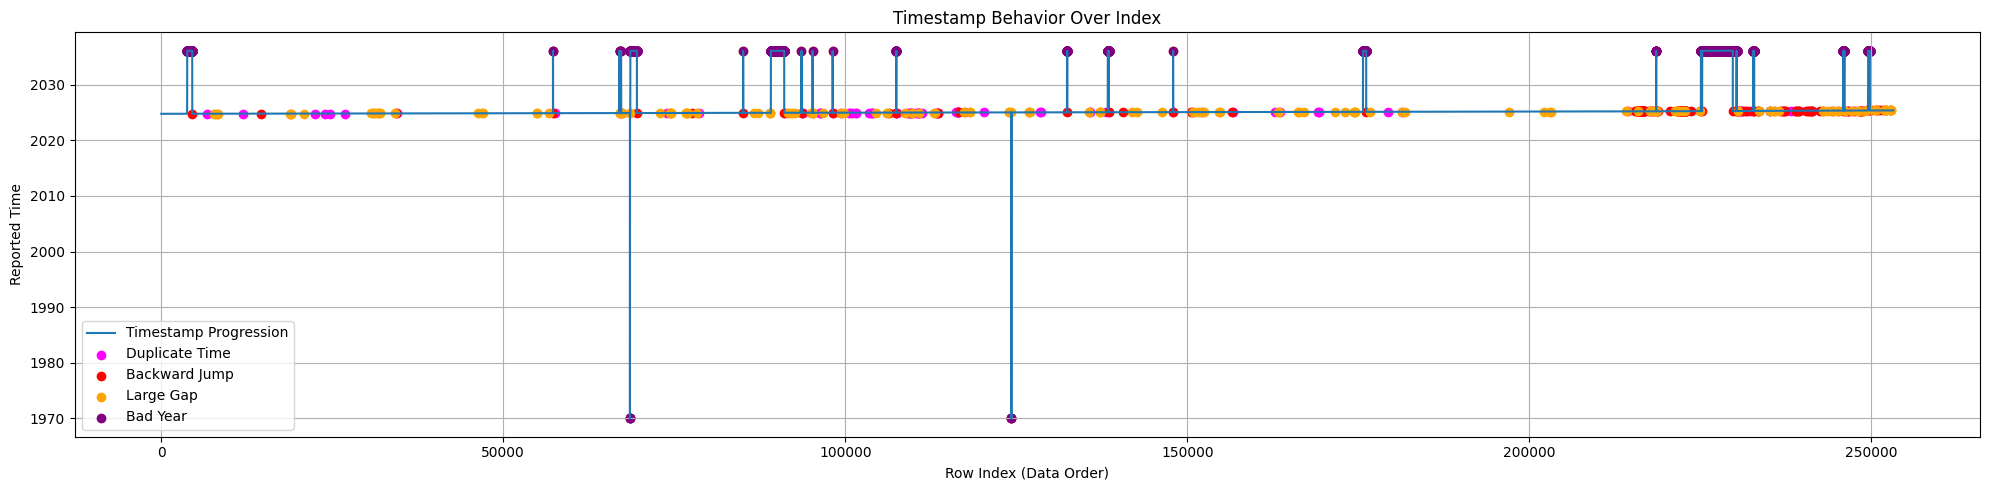

In [10]:
def visualize(dff):
    plt.figure(figsize=(20, 5))

    plt.plot(dff.index, dff['Time'], label='Timestamp Progression')


    plt.scatter(dff[dff['DuplicateTime']].index, dff[dff['DuplicateTime']]['Time'], 
                color='magenta', label='Duplicate Time')
    plt.scatter(dff[dff['BackwardJump']].index, dff[dff['BackwardJump']]['Time'], 
                color='red', label='Backward Jump')
    plt.scatter(dff[dff['LargeGap']].index, dff[dff['LargeGap']]['Time'], 
                color='orange', label='Large Gap')
    plt.scatter(dff[dff['BadYear']].index, dff[dff['BadYear']]['Time'], 
                color='purple', label='Bad Year')

    plt.xlabel("Row Index (Data Order)")
    plt.ylabel("Reported Time")
    plt.title("Timestamp Behavior Over Index")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
visualize(df)

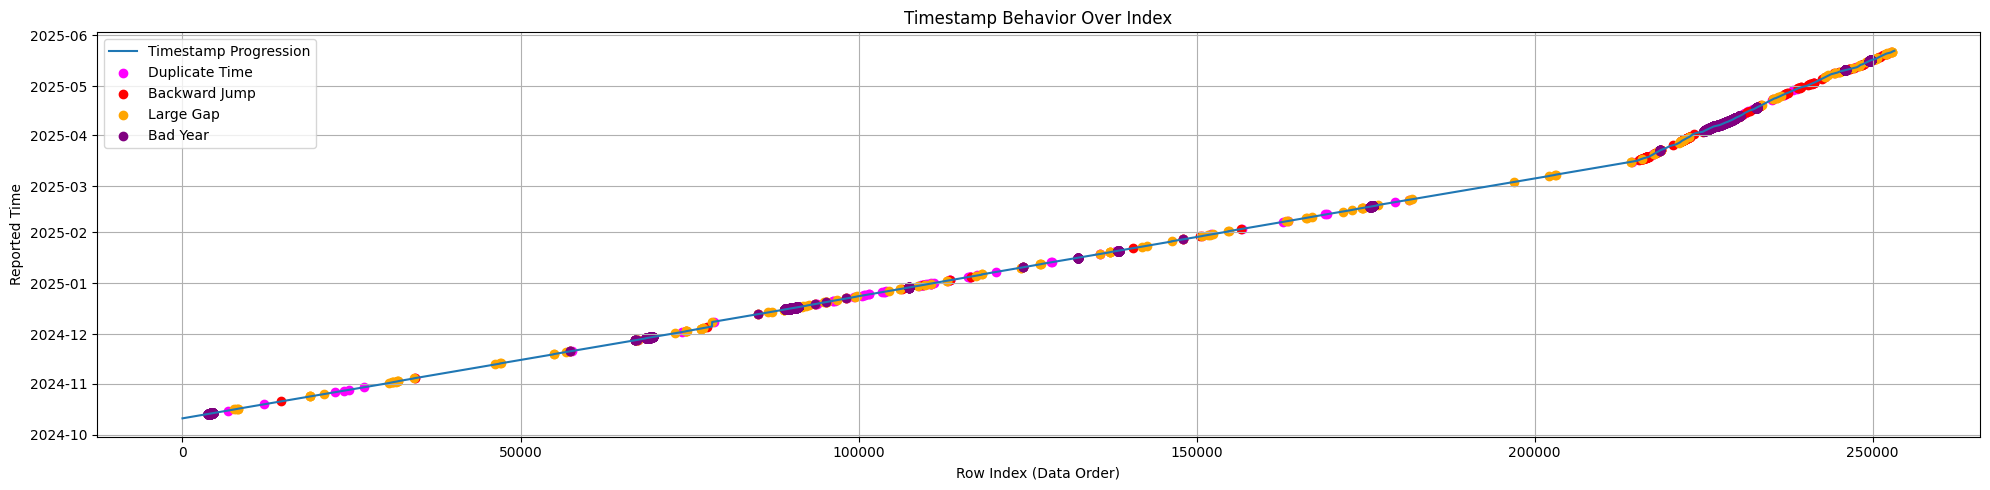

In [11]:
def fix_bad_years(dff):
    dfc = dff.copy()
    fixed_times = dfc['Time'].copy()

    bad_mask = dfc['BadYear'].values
    i = 0

    while i < len(dfc):
        if not bad_mask[i]:
            i += 1
            continue

        start = i
        while i < len(dfc) and bad_mask[i]:
            i += 1
        end = i  # First good row after the bad block

        if end >= len(dfc) or start == 0:
            continue

        # Calculate time correction as offset
        last_bad_time = fixed_times[end - 1]
        next_good_time = fixed_times[end]
        error = next_good_time - last_bad_time

        # Apply the same shift to all bad timestamps
        for j in range(start, end):
            fixed_times[j] += error

    dfc['Time'] = fixed_times
    visualize(dfc)  # Optional: your visualization method
    return dfc


fixed_badyears_df = fix_bad_years(df)


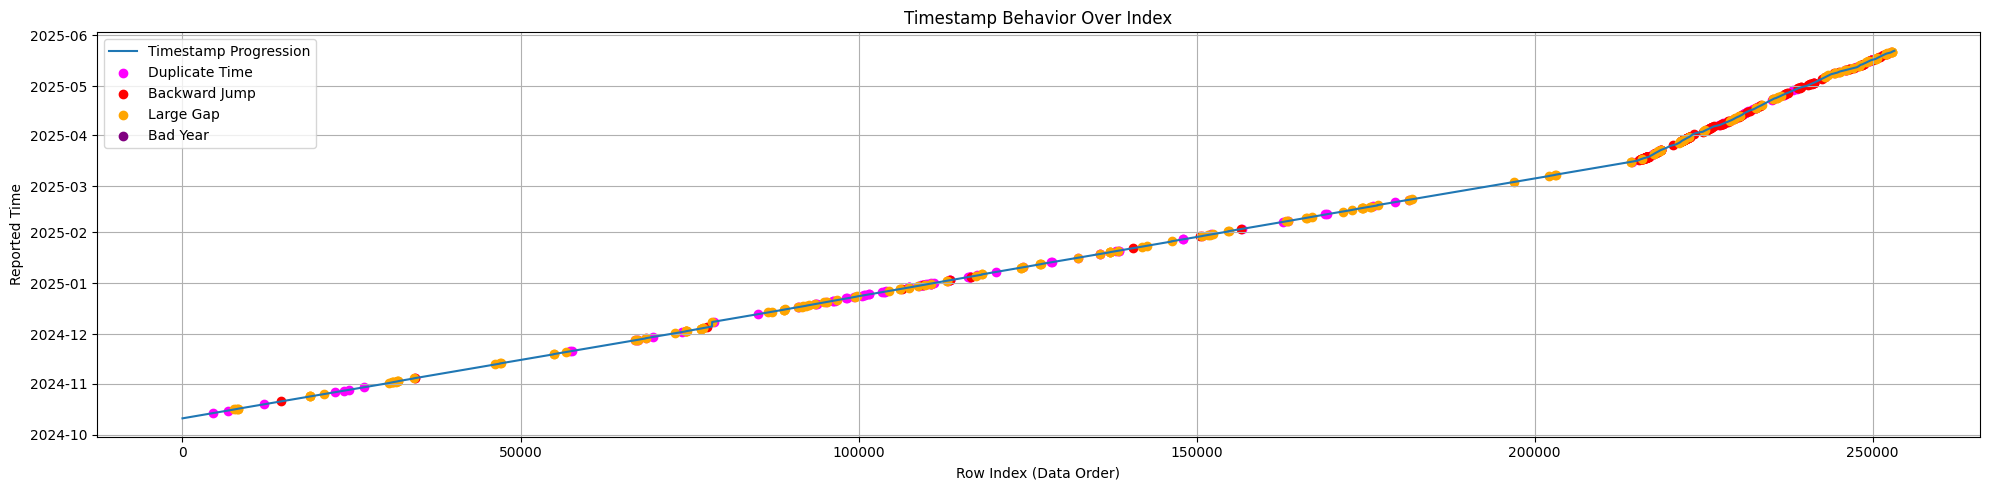

In [12]:
df = fixed_badyears_df
df = initialize(df)
visualize(df)

In [ ]:
selecting = [x-1 for x in df[df["BackwardJump"]].index]
backIndex = df[df["BackwardJump"]].index.tolist()
backIndex.extend(selecting)
df.iloc[backIndex].sort_index()

[14569, 34386, 77611, 106421, 109577, 113486, 116662, 140642, 150496, 156532, 215405, 215727, 215774, 215795, 215811, 215907, 215944, 215964, 216017, 216119, 216123, 216129, 216138, 216142, 216147, 216156, 216188, 216199, 216202, 216206, 216212, 216217, 216234, 216253, 216255, 216275, 216344, 216427, 216478, 216498, 216513, 216516, 216519, 216526, 216529, 216561, 216564, 216580, 216582, 216605, 216612, 216657, 216661, 216670, 216683, 216705, 216712, 216720, 216785, 216804, 216852, 217844, 217878, 218172, 218705, 218723, 218730, 220482, 221648, 221655, 221741, 221755, 221771, 221774, 221776, 221788, 221852, 221881, 221977, 221997, 222002, 222028, 222031, 222069, 222077, 222081, 222113, 222115, 222172, 222200, 222203, 222224, 222386, 222533, 222558, 222576, 222666, 222671, 222676, 222783, 222811, 222868, 222874, 222901, 222903, 222956, 223611, 224926, 225275, 225458, 225469, 225841, 225872, 225929, 225991, 226054, 226200, 226224, 226583, 227426, 227679, 227718, 227795, 227869, 228624, 22

,Time,IRMS1,IRMS2,IRMS3,TimeDiff,LargeGap,BackwardJump,DuplicateTime,BadYear
14568,2024-10-21 06:59:00+00:00,2.53,0.47,10.63,60.0,False,False,False,False
14569,2024-10-21 06:50:00+00:00,2.07,10.48,2.19,-540.0,False,True,False,False
34385,2024-11-04 10:34:00+00:00,2.90,0.22,1.06,60.0,False,False,False,False
34386,2024-11-04 10:30:00+00:00,2.25,0.24,1.08,-240.0,False,True,False,False
77610,2024-12-05 07:32:00+00:00,1.64,0.32,4.47,60.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...
251049,2025-05-18 19:15:00+00:00,4.53,0.43,1.99,-240.0,False,True,False,False
251511,2025-05-19 17:25:00+00:00,3.39,0.48,3.23,60.0,False,False,False,False
251512,2025-05-19 17:24:00+00:00,3.41,0.49,3.24,-60.0,False,True,False,False
252106,2025-05-20 19:01:00+00:00,3.73,0.74,3.81,60.0,False,False,False,False


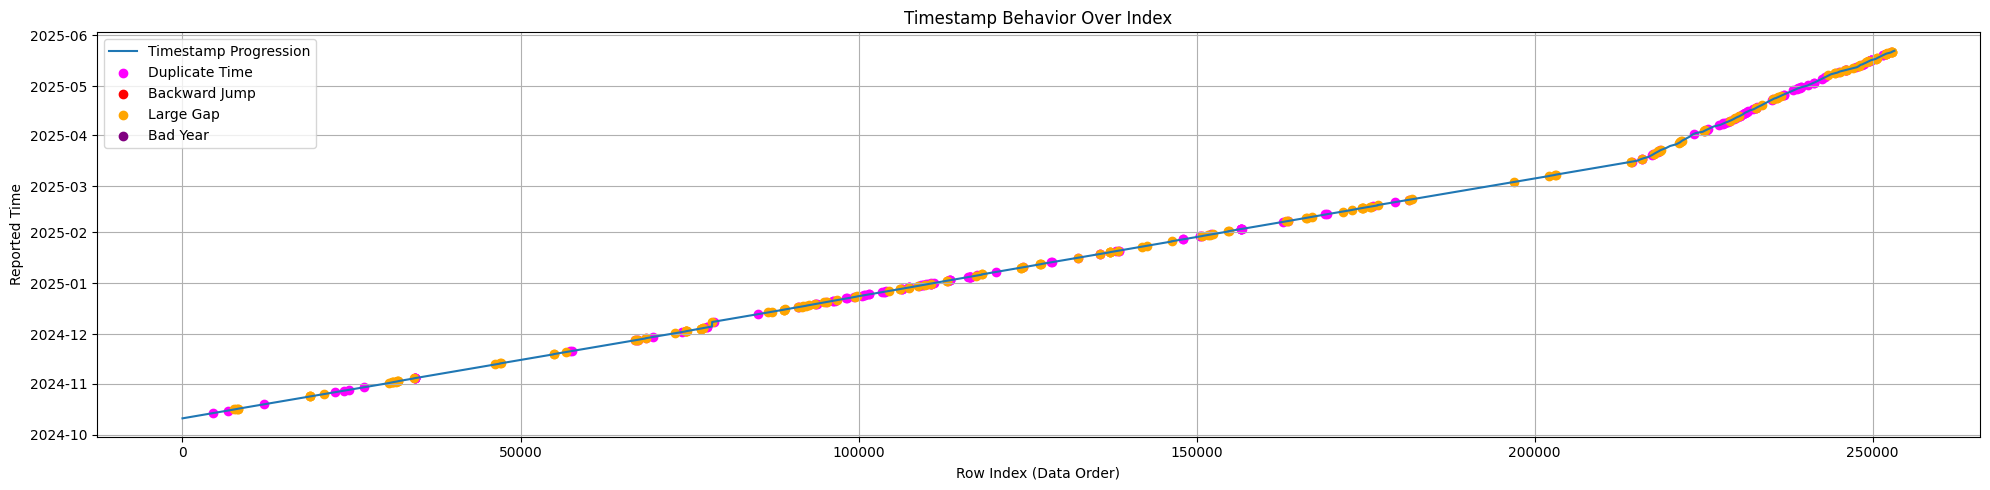

In [14]:
def fix_backward(dff):
    dfc = dff.copy()
    dfc = dfc.sort_values(by="Time").reset_index(drop=True)
    visualize(initialize(dfc))
    return dfc
backward_fixed_df = fix_backward(df)

In [ ]:
df = backward_fixed_df.drop_duplicates(subset=['Time'])
selecting = [x-1 for x in df[df["BackwardJump"]].index]
backIndex = df[df["BackwardJump"]].index.tolist()
backIndex.extend(selecting)
df.iloc[backIndex].sort_index()

,Time,IRMS1,IRMS2,IRMS3,TimeDiff,LargeGap,BackwardJump,DuplicateTime,BadYear
14566,2024-10-21 06:52:00+00:00,2.08,10.39,2.13,60.0,False,False,False,False
14567,2024-10-21 06:53:00+00:00,2.09,10.42,2.13,60.0,False,False,False,False
109627,2024-12-31 02:27:00+00:00,1.82,0.56,0.91,60.0,False,False,False,False
109628,2024-12-31 02:28:00+00:00,1.84,0.58,0.93,60.0,False,False,False,False
140722,2025-01-22 12:53:00+00:00,1.72,0.25,0.25,60.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...
251026,2025-05-18 18:10:00+00:00,2.65,0.41,2.70,60.0,False,False,False,False
251215,2025-05-19 03:14:00+00:00,2.45,10.96,10.51,180.0,False,False,False,False
251216,2025-05-19 03:19:00+00:00,2.41,10.68,9.57,300.0,False,False,False,False
252275,2025-05-20 23:52:00+00:00,10.82,0.88,11.17,60.0,False,False,False,False


In [19]:
df

,Time,IRMS1,IRMS2,IRMS3,TimeDiff,LargeGap,BackwardJump,DuplicateTime,BadYear
0,2024-10-11T00:00:00Z,2.07,9.92,10.73,NaN,False,False,False,False
1,2024-10-11T00:01:00Z,1.22,9.66,10.78,60.0,False,False,False,False
2,2024-10-11T00:02:00Z,1.28,9.94,10.80,60.0,False,False,False,False
3,2024-10-11T00:03:00Z,1.28,10.14,10.84,60.0,False,False,False,False
4,2024-10-11T00:04:00Z,1.22,9.96,10.84,60.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...
253205,2025-05-22T11:34:00Z,3.77,10.32,19.96,240.0,False,False,False,False
253206,2025-05-22T11:35:00Z,3.80,10.18,19.83,60.0,False,False,False,False
253207,2025-05-22T11:39:00Z,3.18,1.13,11.67,240.0,False,False,False,False
253208,2025-05-22T11:44:00Z,3.09,1.22,11.71,300.0,False,False,False,False


In [17]:
df['Time'] = df['Time'].dt.strftime('%Y-%m-%dT%H:%M:%SZ') 

df.drop(columns=['TimeDiff', 'BackwardJump', 'BadYear', 'LargeGap', 'DuplicateTime']).to_csv("cleaned_data.csv", index=False)

C:\Users\sasim\AppData\Local\Temp\ipykernel_27548\4055077697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
